<a href="https://colab.research.google.com/github/ristaangdembay/Bootcamp-DA-AI/blob/main/Project_8_NYSE_HSBC_Stock_Price_Forecast(Rista_Angdembay).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYSE :HSBC Forecast Factory: Stock Price Prediction

- ## Step 1. Data Collection


In [ ]:
# Import libraries

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Download historical stock price data from yahoo finance
ticker = 'HSBC'
data = yf.download(ticker, start = '2020-01-01', end = '2022-11-30')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,39.139999,39.369999,39.080002,39.369999,30.197840,2046900
2020-01-03,38.630001,38.930000,38.610001,38.759998,29.729952,1694800
2020-01-06,38.279999,38.650002,38.279999,38.630001,29.630238,1807500
2020-01-07,38.270000,38.389999,38.220001,38.340000,29.407804,2638800
2020-01-08,37.900002,38.380001,37.900002,38.250000,29.338766,2299600
...,...,...,...,...,...,...
2022-11-22,28.850000,29.139999,28.809999,28.950001,24.764246,1887400
2022-11-23,29.330000,29.559999,29.309999,29.469999,25.209063,2596500
2022-11-25,29.639999,29.799999,29.580000,29.719999,25.422913,756600


In [ ]:
# we will only work with 'Close' price for the HSBC so we extract the close price
stock_prices = data['Close']


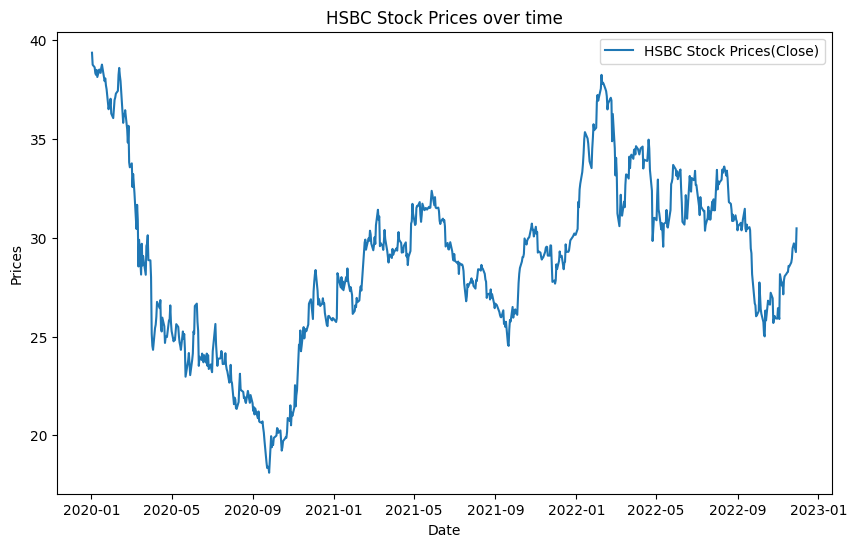

In [ ]:
# Plot the data
plt.figure(figsize = (10, 6))
plt.plot(stock_prices, label = 'HSBC Stock Prices(Close)')
plt.title('HSBC Stock Prices over time')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

## Step 2. Check for Stationaroty :
 As ARIMA model requires the data to be stationary, meaning it should be adjusted for trend and seasonality. We use ADF test to check for stationarity and apply the differencing if necessary.

In [ ]:
# Import ADF as adfuller
from statsmodels.tsa.stattools import adfuller

# Perform Agumented Dickey Fuller(ADF) test to check for stationarity
result = adfuller(stock_prices)

print(f"ADF Statistic : {result[0]}")
print(f"p-value : {result[1]}")

if result[1]>0.05:
  print("The series is not stationarity, applyin differencing...")
  stock_prices_diff = stock_prices.diff().dropna()
else:
  print("The Series is Stationary")

ADF Statistic : -2.7009627449606644
p-value : 0.0738718202323581
The series is not stationarity, applyin differencing...


## Step 3: ACF  and PACF Plots:
ACF and PACF plots help in selecting the parameters(p,q) of the ARIMA model.

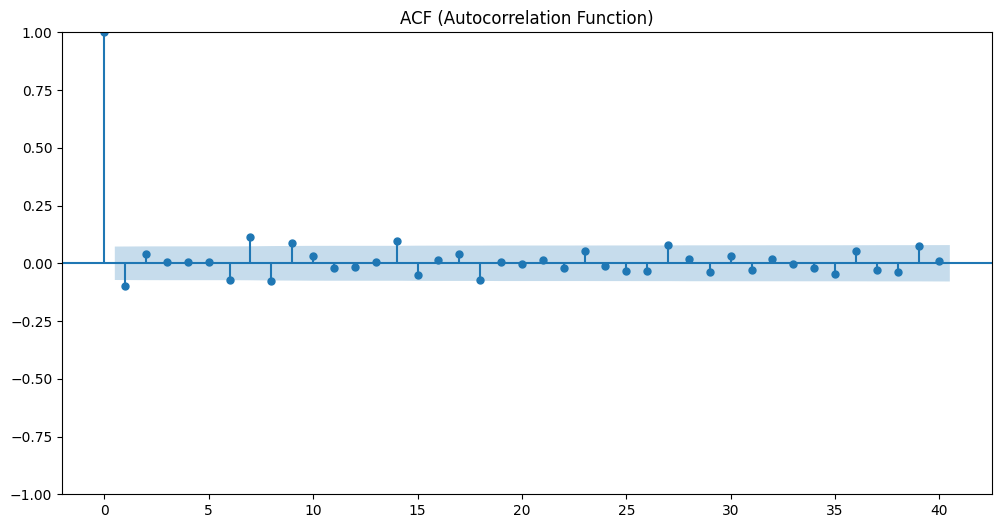

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (12, 6))
plot_acf(stock_prices_diff, lags = 40, ax = plt.gca())
plt.title("ACF (Autocorrelation Function)")
plt.show()

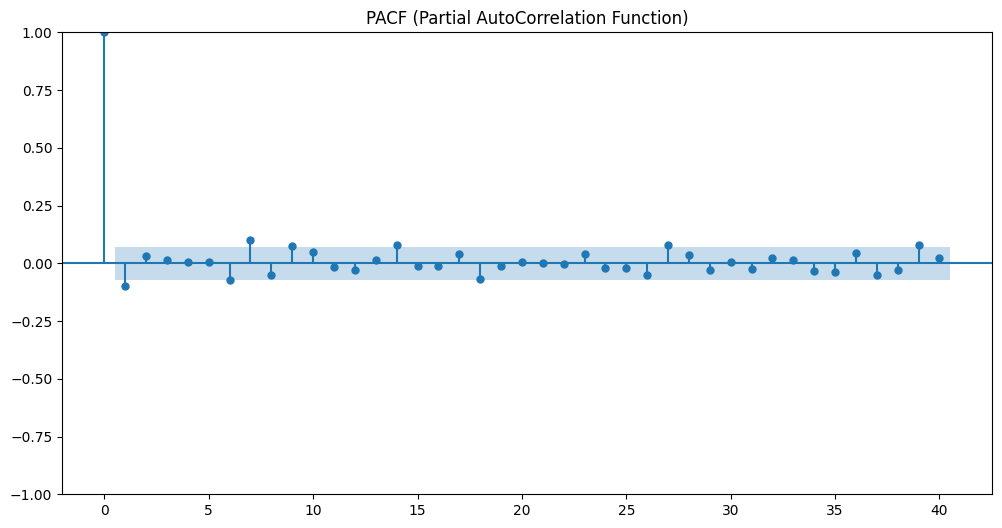

In [ ]:
plt.figure(figsize = (12, 6))
plot_pacf(stock_prices_diff, lags = 40, ax = plt.gca())
plt.title("PACF (Partial AutoCorrelation Function)")
plt.show()

## Step 4: Fit the ARIMA Model:
Based on the ACF nad PACF plots, we select p =2, and q = 1, d= 1 .

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(stock_prices, order = (2, 1, 1))
model_fit = model.fit()

# print the summary of the model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  734
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -677.421
Date:                Tue, 22 Oct 2024   AIC                           1362.843
Time:                        21:57:35   BIC                           1381.231
Sample:                             0   HQIC                          1369.936
                                - 734                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2632      0.754      0.349      0.727      -1.214       1.740
ar.L2          0.0671      0.078      0.860      0.390      -0.086       0.220
ma.L1         -0.3598      0.758     -0.475      0.6

# Step 5: Forecast
Forcast the futire closing price of HSBC  n

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


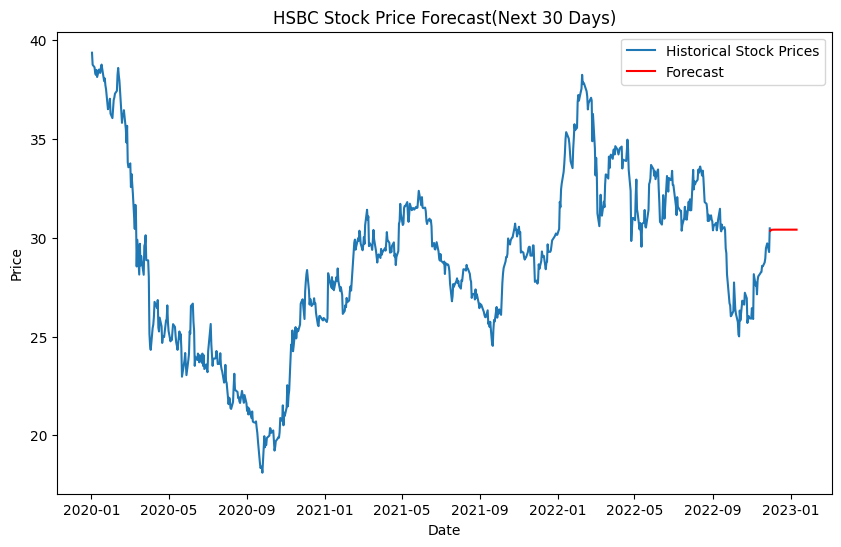

In [ ]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps = 30)

# Plot the Forecast
plt.figure(figsize = (10,6))
plt.plot(stock_prices, label = 'Historical Stock Prices')
plt.plot(pd.date_range(start = stock_prices.index[-1], periods = 31, freq = 'B')[1:], forecast, label = 'Forecast', color = 'red')
plt.title(f"{ticker} Stock Price Forecast(Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
forecast
forecast.shape

(30,)

# Step 6: Model Evaluation

In [ ]:
# Import closing prices of HBSC for next 30 days
test = yf.download(ticker, start = '2022-12-01', end = '2023-01-15')
test_set = test['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
test_set.shape


(30,)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcualte RMSE
rmse = np.sqrt(mean_squared_error(test_set, forecast))
print(f"RMSE:{rmse:.2f}")

RMSE:2.18
